<a href="https://colab.research.google.com/github/naufalahnaf17/tensorflow_learning/blob/main/01_tensorflow_regression_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal

pada section ini kita akan belajar Memprediksi Medical Cost Personal dengan dataset dari Kaggle dan melatih model agar hasil training akurat

## Import library yang dibutuhkan

In [33]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

## Load Data Medical Cost Personal

In [29]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Membuat Model Tanpa Normalization

### Setup Features dan Labels (X,y) pada data Insurance

pada data ini kita akan menggunakan one hot encoding menggunakan panda pada column non numerical

In [34]:
# Check apakah ada value yang kosong atau tidak
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
# Check Columns Data Insurance
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [40]:
# Check data insurance
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
# One Hot Encoding Pada Non Numerical Column
insurance_hot = pd.get_dummies(insurance)
insurance_hot = insurance_hot.astype(float)
insurance_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [44]:
# Membuat X
X = insurance_hot.drop("charges",axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [45]:
# Membuat Y
y = insurance_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [48]:
# X dan y sudah jadi, mari kita train_test_split dan selanjutnya membuat model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Kita hitung jumlah masing masing variable
len(X_train),len(X_test),len(y_train),len(y_test)

(1070, 268, 1070, 268)

### Mari kita buat 3 Model berbeda untuk melakukan evaluasi mana model yang terbaik

1. model_1
 - dense(1)
 - optimizer Adam
 - epochs 100
2. model_2
 - dense(100)
 - dense(10)
 - dense(1)
 - optimizer Adam
 - epochs 200
3. model_3
 - dense(100,activativation='relu')
 - dense(10,activativation='relu')
 - dense(1)
 - optimizer Adam & learning_rate 0.02
 - epoch 200


#### Pembuatan Model 1 Dan Hasil Evaluasi
- model_1
 - dense(1)
 - optimizer Adam
 - epochs 100


In [58]:
# Set Random set_seed
tf.random.set_seed(42)

# Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model_1.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics="mae")

# Buat History dan Training (kita pakai verbose 0 agar log nya tidak muncul)
model_1_history = model_1.fit(X_train,y_train,epochs=100,verbose=0)

In [59]:
# Evaluate Model 1
model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 12723.8193 - mae: 12723.8193


[12723.8193359375, 12723.8193359375]

Hasil Evaluasi Model 1

Error : $12723.8193

<Axes: >

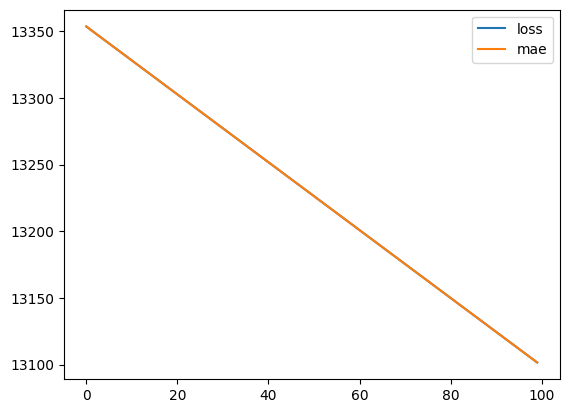

In [60]:
# Visualisasikan Hasil Training Model 1
pd.DataFrame(model_1_history.history).plot()

#### Pembuatan Model 2 Dan Hasil Evaluasi

model_2
 - dense(100)
 - dense(10)
 - dense(1)
 - optimizer Adam
 - epochs 200

In [64]:
# Set Random set_seed
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile Model
model_2.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics="mae")

# Buat History dan Training (kita pakai verbose 0 agar log nya tidak muncul)
model_2_history = model_2.fit(X_train,y_train,epochs=200,verbose=0)

In [65]:
# Evaluate Model 2
model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3478.1941 - mae: 3478.1941


[3478.194091796875, 3478.194091796875]

Hasil Evaluasi Model 2

Error : $3478.1940



<Axes: >

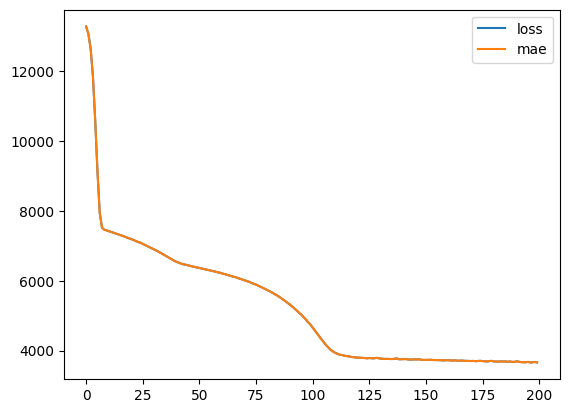

In [68]:
# Visualisasikan Hasil Training Model 2
pd.DataFrame(model_2_history.history).plot()

#### Pembuatan Model 3 Dan Hasil Evaluasi

model_3
 - dense(100,activativation='relu')
 - dense(10,activativation='relu')
 - dense(1)
 - optimizer Adam & learning_rate 0.02
 - epoch 200

In [69]:
# Set Random set_seed
tf.random.set_seed(42)

# Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1),
])

# Compile Model
model_3.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),metrics="mae")

# Buat History dan Training (kita pakai verbose 0 agar log nya tidak muncul)
model_3_history = model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [70]:
# Evaluate Model 3
model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1938.1421 - mae: 1938.1421


[1938.14208984375, 1938.14208984375]

Hasil Evaluasi Model 3

Error : $1938.1420



<Axes: >

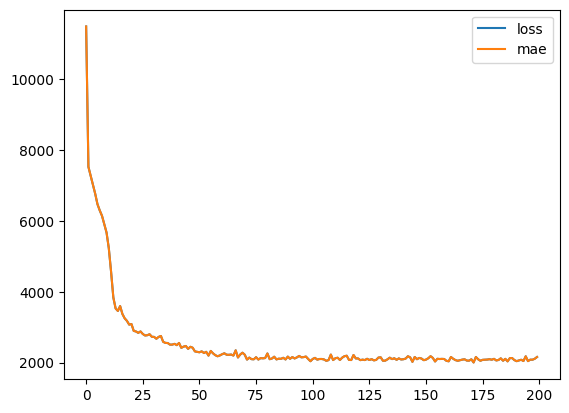

In [71]:
# Visualisasikan Hasil Training Model 3
pd.DataFrame(model_3_history.history).plot()

### Kesimpulan 3 Model yang dibuat

model_1 -> model ini memiliki error yang cukup tinggi

model_2 -> model ini memiliki error yang lebih baik dari model_1 namun untuk tingkat akurasi nya sediri masih jauh dari yang diharapkan

model_3 -> model ini sudah lebih baik dari model 2 namun sekali lagi untuk akurasi masih jauh dari yang diharapkan

#### Visualisasi ketiga model yang telah dibuat

<Axes: >

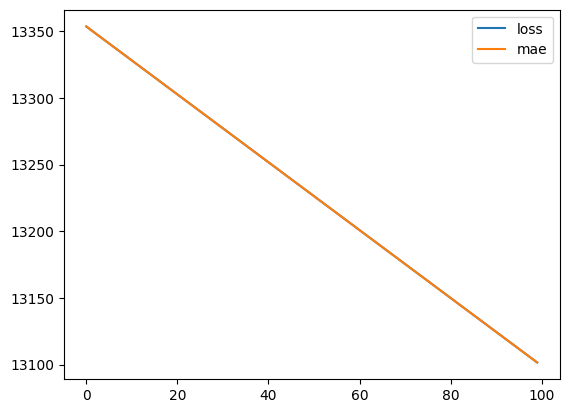

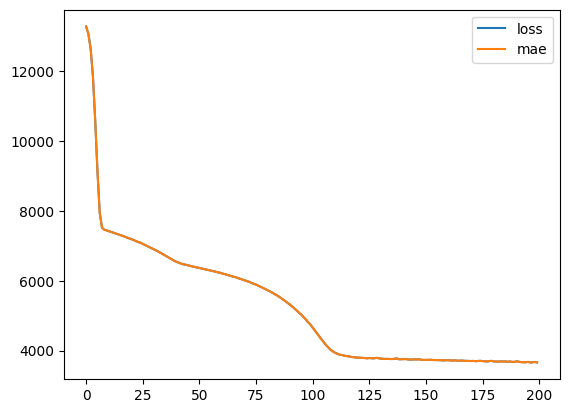

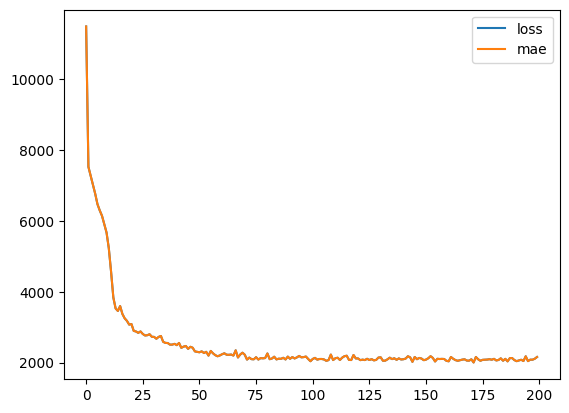

In [72]:
pd.DataFrame(model_1_history.history).plot()
pd.DataFrame(model_2_history.history).plot()
pd.DataFrame(model_3_history.history).plot()

## Membuat Model Dengan Normalization

### Setup Features dan Labels (X,y) pada data Insurance

pada data ini kita akan melakukan normalization terlebih dahulu pada data insurance lalu untuk ketiga model yang akan dibuat akan sama seperti rule diatas

In [73]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [75]:
insurance.shape

(1338, 7)

In [76]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [96]:
column_transformer = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # karna age,bmi dan children memiliki data yang beragam maka dipilih columns tersebut
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"]) # karna sex,smoker dan region adalah data berupa pilihan maka dipilihkan columns tersebut
)

# Setup Variable X dan y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]


# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Fit Column Transformer
column_transformer.fit(X_train)
X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

In [94]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [89]:
X_test_normal[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

### Mari kita buat 3 Model berbeda untuk melakukan evaluasi mana model yang terbaik

1. model_4
 - dense(1)
 - optimizer Adam
 - epochs 100
2. model_5
 - dense(100)
 - dense(10)
 - dense(1)
 - optimizer Adam
 - epochs 200
3. model_6
 - dense(100,activativation='relu')
 - dense(10,activativation='relu')
 - dense(1)
 - optimizer Adam & learning_rate 0.02
 - epoch 200


#### Pembuatan Model 4 Dan Hasil Evaluasi
- model_4
 - dense(1)
 - optimizer Adam
 - epochs 100


In [99]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_4.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics="mae")
model_4_history = model_4.fit(X_train_normal,y_train,epochs=100,verbose=0)

In [103]:
model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 12950.4707 - mae: 12950.4707


[12950.470703125, 12950.470703125]

<Axes: >

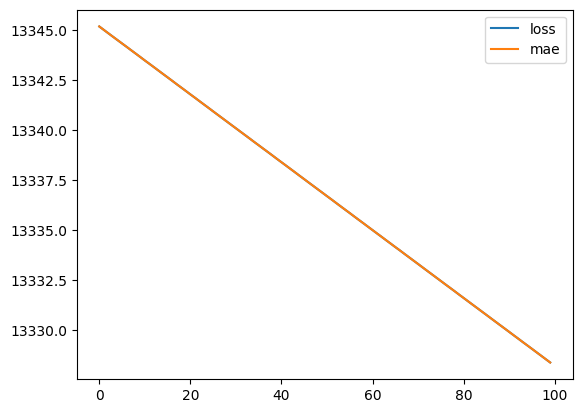

In [104]:
pd.DataFrame(model_4_history.history).plot()

#### Pembuatan Model 5 Dan Hasil Evaluasi
model_5
 - dense(100)
 - dense(10)
 - dense(1)
 - optimizer Adam
 - epochs 200

In [105]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_5.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics="mae")
model_5_history = model_5.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [107]:
model_5.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3166.6528 - mae: 3166.6528


[3166.65283203125, 3166.65283203125]

<Axes: >

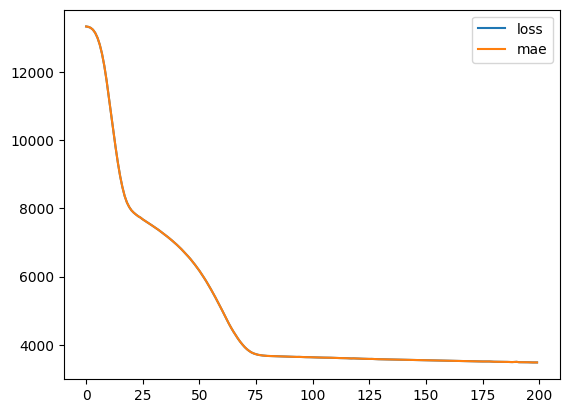

In [108]:
pd.DataFrame(model_5_history.history).plot()

#### Pembuatan Model 6 Dan Hasil Evaluasi

model_6
 - dense(128,activativation='relu')
 - dense(100,activativation='relu')
 - dense(10,activativation='relu')
 - dense(1)
 - optimizer Adam & learning_rate 0.02
 - epoch 300

In [122]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation=None),
    tf.keras.layers.Dense(1),
])

model_6.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),metrics="mae")
model_6_history = model_6.fit(X_train_normal,y_train,epochs=400,verbose=0)

In [123]:
model_6.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1548.2982 - mae: 1548.2982


[1548.2982177734375, 1548.2982177734375]

<Axes: >

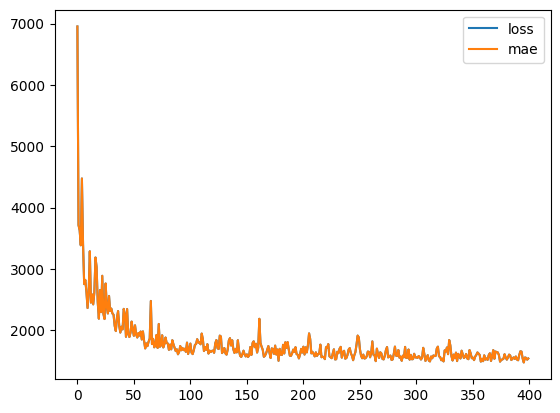

In [124]:
pd.DataFrame(model_6_history.history).plot()

# Medical Cost Personal

Kesimpulan dari beberapa model yang telah dibuat, dengan melakukan normalisasi pada data, kita bisa membuat hasil prediksi semakin baik